In [ ]:
""" Optical pumping simulation
    Preston Huft, May 2019
"""

In [10]:
%matplotlib notebook
from matplotlib import pyplot as plt
from sympy.physics.wigner import wigner_6j,wigner_3j,clebsch_gordan
from sympy import init_printing,N
import numpy as np
from random import random as rand
import math as m
from math import sqrt,pow

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1

<IPython.core.display.Javascript object>


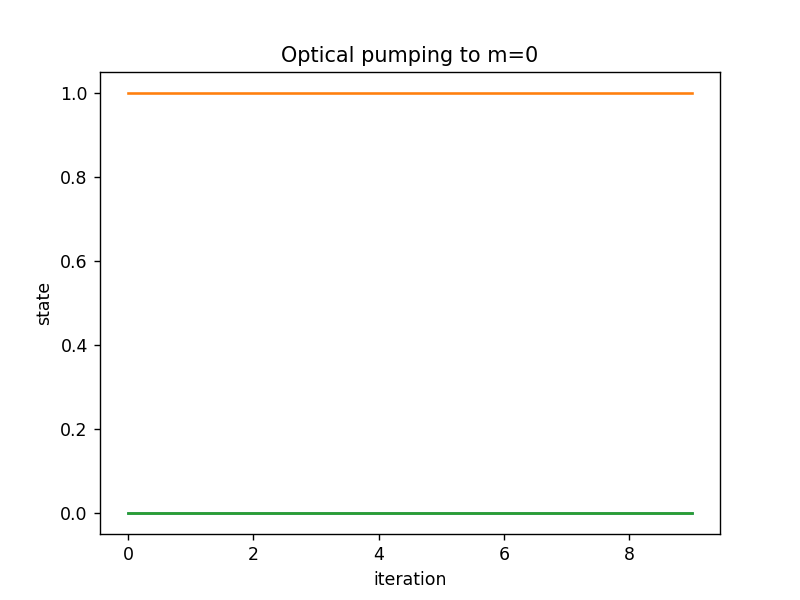

In [16]:
def populate(num,states):
    """ 'num':length of array
        'states': list of states
    """
    arr = np.empty(num)
    s = len(states)
    for i in range(0,len(arr)):
        arr[i] = states[int(rand()*s)] # array of randomly chosen states
    return arr

f_e = 2; f_g = 1
state_e = [x for x in range(-f_e,f_e+1)] # mF states in |e>
state_g = [x for x in range(-f_g,f_g+1)] # mF states in |g>

probs = [] # prob a transition between |e>,|g> for particular mF levels
i = 0;
for m_e in state_e:
    probs.append([])
    for m_g in state_g:
        if (abs(m_e - m_g) <= 1) & (abs(m_e)+abs(m_g)!=0): # 0 -> 0 is disallowed by parity
            probs[i].append(1)
        else:
            probs[i].append(0)
    i+=1
    
probs = [[p/sum(prob) for p in prob] for prob in probs] # normalize the probs for each decay path
    
atom_num = 100 # number of atoms

# randomized atoms in ground state
gnd_arr = populate(atom_num,state_g) # store the most recent ground states
exc_arr = np.empty(atom_num) # store the most recent excited states

# excitation and decay cycle for all atoms
q = 0 # linear light

cycles = 10
gnd_states = np.empty(cycles,dtype=list) # the atom states at each iteration
gnd_states[0]=gnd_arr
for j in range(1,cycles):
    for i in range(0,atom_num):
        if gnd_arr[i] != f_g: # the mF = 0 sublevel is dark
            m_g = gnd_arr[i]
            exc_arr[i] = m_g+q # excite the atom
            p = 0
            m_g = 0 
            while p == 0: # iterate until an allowed decay path is found
                m_g = int(rand()*(2*f_g+1)) # random m_g level index
                p = probs[m_e][m_g] 
            gnd_arr[i] = state_g[m_g] # let the atom decay
    gnd_states[j] = gnd_arr
print(gnd_states)

# get the population at each iteration 
populations = np.empty(2*f_g+1,dtype=list) # lists of populations by m sublevel
for i in range(0,2*f_g+1):
    populations[i]=[]
    
for cycle in gnd_states: # iterate through the atom states over iterations
    for m in range(0,2*f_g+1):
        m_pop = 0
        for c in cycle:
            if c == m:
                m_pop+=1
        populations[m].append(m_pop/atom_num)
    
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set_ylim((0,1))
# ax.set_xlim((0,t_exp))
ax.set_title('Optical pumping to m=0')
ax.set_xlabel('iteration')
ax.set_ylabel('state')

comp_time = 0
for pop in populations:
    ax.plot(pop)

plt.show()

In [24]:
int(rand()*3)

2.715578619404129

In [32]:
x =np.empty(5,dtype=list)

In [30]:
a = [1,2]

In [33]:
x[0]=a

In [34]:
x

array([list([1, 2]), None, None, None, None], dtype=object)

In [36]:
x[0]

[1, 2]

In [4]:
x = np.empty(5)
x

array([1.28357783e+294, 2.37399720e+289, 1.79756763e+290, 1.40738108e+294,
       2.12989054e+289])

In [5]:
for xi in x:
    xi = 0
x

array([1.28357783e+294, 2.37399720e+289, 1.79756763e+290, 1.40738108e+294,
       2.12989054e+289])

In [6]:
a = 5

In [7]:
a /= 5

In [8]:
a

1.0